<a href="https://colab.research.google.com/github/wazs555/Data_mining_project/blob/master/data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
data = pd.read_csv('/content/drive/My Drive/데이터마이닝/diabetes.csv')
data.describe().T # data에 대해 boxplot 형식의 data.describe생성. 
''' 
1. Pregnancies : 임신 횟수
2. Glucose : 포도당 부하 수치
3. Blood Pressure : 혈압(수축기 혈압 - 이완기 혈압)
4. SkinThickness : 팔 삼두근 뒤 쪽의 피하지방 측정값
5. Insuline : 혈청 인슐린
6. BMI
7. Diabetes Pedigree Function : 당뇨 내력 가중치
8. Age : 나이
9. Outcome : 결과 값, Label
'''

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [13]:
print(data.isnull().sum()) # data에 NULL값은 존재하지않는다.
print('\n', data.isna().sum())#data에 na값은 존재하지않는다.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [0]:
#Data Preprocessing
''' Data에 대한 전처리를 진행하려 하였음 - > null값이나 na값은 존재하지않고 모든 값들이 숫자로 존재
사람에 대한 정보라 pregnancies가 17이 나오는 그런 상황을 전처리하기 뭐한 상태'''

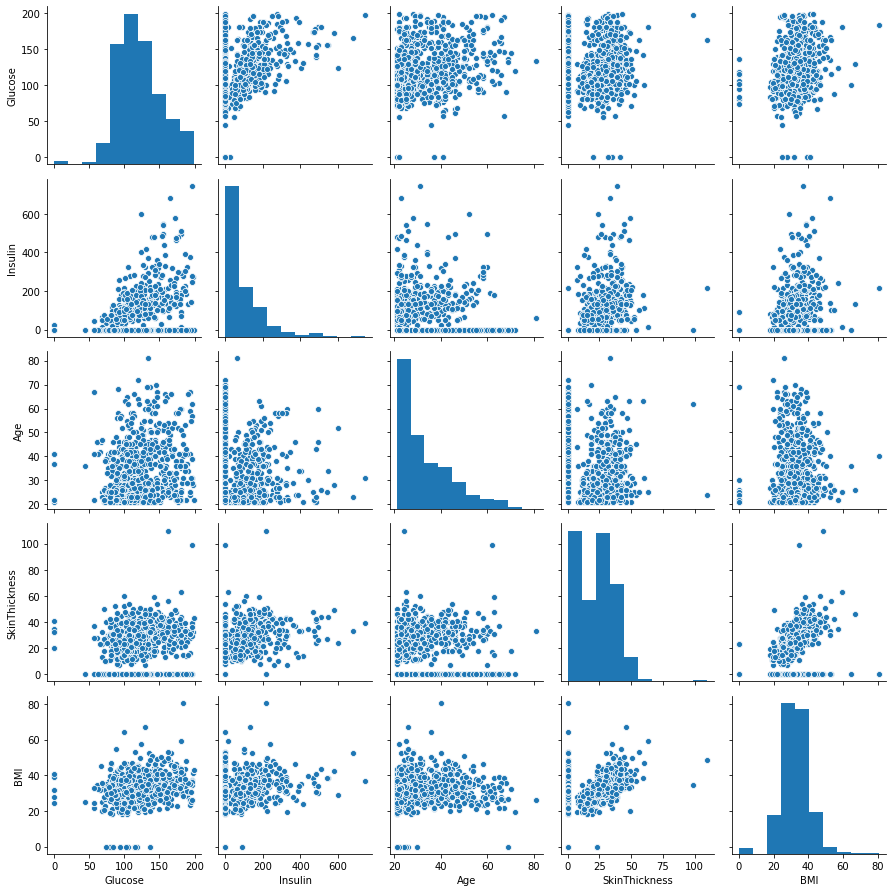

In [57]:
columns = ['Glucose', 'Insulin', 'Age', 'SkinThickness', 'BMI'] #우선 중요한 Factor 위주로 Scatterplot 을 시각화했다.
sns.pairplot(data[columns]) # 각 feature들을 Scatterplot으로 시각화 해봤을 때 선형관계를 보이는 feature는 관측하기 어려웠다. but BMI와 SkinThickness 약간 선형관계를 갖는것으로 보임.
plt.tight_layout()
plt.show()

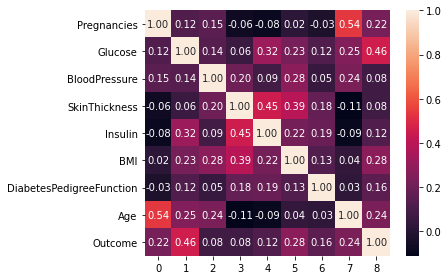

In [48]:
#pearsom 상관계수를 구해서 데이터를 시각화. 상관관계를 갖는 것을 대략적으로 분석해보려함
cm = np.corrcoef(data.values.T)
#sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size' : 15}, yticklabels=columns, xticklabels=columns)
sns.heatmap(cm, fmt = '.2f', cbar = True, annot = True, square=True, yticklabels=data.columns)
plt.tight_layout()#자동으로 레이아웃을 맞춰주는 함수.
plt.show()

'''상관계수가 높은 순으로 봤을 때 feature 기준 1. Age, Pregnancies : 어느정도 이해가 감. 
 위에서 scatterplot을 찍어봤을 때는 SkinThickness와 BMI가 더 관계 있어보였지만 실제로 상관계수는 SkinThickness와 insulin의 상관계수가 더 높았다.'''

In [24]:
print(data.values[:,-1]) #label에서 양성인 사람과 음성인 사람의 수 check
cnt_1 = 0
cnt_0 = 0
for i in data.values[:,-1]:
  if i == 1:
    cnt_1 = cnt_1 + 1
  else:
    cnt_0 = cnt_0 + 1
print('당뇨에 양성인 사람의 수', cnt_1, '명', cnt_1/2000*100, '%')
print('당뇨에 음성인 사람의 수', cnt_0, '명', cnt_0/2000*100, '%')

[1. 0. 1. ... 0. 1. 0.]
당뇨에 양성인 사람의 수 684 명 34.2 %
당뇨에 음성인 사람의 수 1316 명 65.8 %


In [49]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

print(X,'\n', Y)

      Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0               2      138             62  ...  33.6                     0.127   47
1               0       84             82  ...  38.2                     0.233   23
2               0      145              0  ...  44.2                     0.630   31
3               0      135             68  ...  42.3                     0.365   24
4               1      139             62  ...  40.7                     0.536   21
...           ...      ...            ...  ...   ...                       ...  ...
1995            2       75             64  ...  29.7                     0.370   33
1996            8      179             72  ...  32.7                     0.719   36
1997            6       85             78  ...  31.2                     0.382   42
1998            0      129            110  ...  67.1                     0.319   26
1999            2       81             72  ...  30.1                     0.5

In [55]:
from sklearn.model_selection import train_test_split #trainData와 testData 나누기.
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.2, random_state = 5)

print(train_X.describe().T)
print(test_X.describe().T)

                           count        mean  ...      75%     max
Pregnancies               1600.0    3.680625  ...    6.000   17.00
Glucose                   1600.0  121.000625  ...  141.000  199.00
BloodPressure             1600.0   68.818125  ...   78.000  122.00
SkinThickness             1600.0   20.811250  ...   32.000  110.00
Insulin                   1600.0   79.921250  ...  130.000  744.00
BMI                       1600.0   32.088250  ...   36.800   80.60
DiabetesPedigreeFunction  1600.0    0.473362  ...    0.629    2.42
Age                       1600.0   32.923750  ...   40.000   81.00

[8 rows x 8 columns]
                          count        mean  ...        75%     max
Pregnancies               400.0    3.795000  ...    6.00000   17.00
Glucose                   400.0  121.910000  ...  142.25000  197.00
BloodPressure             400.0   70.455000  ...   82.00000  122.00
SkinThickness             400.0   21.430000  ...   33.00000  110.00
Insulin                   400.0   8